<a href="https://colab.research.google.com/github/aliasgharchakera/CUDA_Spring_2024/blob/main/Assignment3/AY06993_MS06860_Assgn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 432 GPU Accelerated Programming
## Assignment 3
### Ali Asghar Yousuf | Mustafa Sohail
### ay06993@st.habib.edu.pk | ms06860@st.habib.edu.pk

### Initialization

#### Downloading the source code for this assignment:
Next, we download the required source files from the github repository of Assignment 3.

In [18]:
!wget -P src/cpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/cpu-smallpt.cpp"
!wget -P src/cpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/geometry.hpp"
!wget -P src/cpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/imageio.hpp"
!wget -P src/cpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/math.hpp"
!wget -P src/cpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/rng.hpp"
!wget -P src/cpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/sampling.hpp"
!wget -P src/cpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/specular.hpp"
!wget -P src/cpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/sphere.hpp"
!wget -P src/cpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/vector.hpp"

File ‘src/cpu/cpu-smallpt.cpp’ already there; not retrieving.

File ‘src/cpu/geometry.hpp’ already there; not retrieving.

--2024-04-05 17:23:48--  https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/imageio.hpp
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aliasgharchakera/CUDA_Spring_2024/main/Assignment3/cpu/imageio.hpp [following]
--2024-04-05 17:23:49--  https://raw.githubusercontent.com/aliasgharchakera/CUDA_Spring_2024/main/Assignment3/cpu/imageio.hpp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 803 [text/plain]
Saving to: ‘src/cpu/imageio.hpp’

imageio.

In [19]:
!wget -P src/gpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/gpu-smallpt.cu"
!wget -P src/gpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/cuda_tools.hpp"
!wget -P src/gpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/geometry.cuh"
!wget -P src/gpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/imageio.hpp"
!wget -P src/gpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/math.hpp"
!wget -P src/gpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/sampling.cuh"
!wget -P src/gpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/specular.cuh"
!wget -P src/gpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/sphere.hpp"
!wget -P src/gpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/vector.hpp"

File ‘src/gpu/gpu-smallpt.cu’ already there; not retrieving.

File ‘src/gpu/cuda_tools.hpp’ already there; not retrieving.

File ‘src/gpu/geometry.cuh’ already there; not retrieving.

--2024-04-05 17:23:53--  https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/imageio.hpp
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aliasgharchakera/CUDA_Spring_2024/main/Assignment3/gpu/imageio.hpp [following]
--2024-04-05 17:23:53--  https://raw.githubusercontent.com/aliasgharchakera/CUDA_Spring_2024/main/Assignment3/gpu/imageio.hpp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

In [30]:
from PIL import Image
import IPython

def convert(device=True):
    if device:
        file_name = "gpu-image"
    else:
        file_name = "cpu-image"
    with open(f"{file_name}.ppm", "r") as file:
        # Read header P3
        header = file.readline()
        # Read width and height
        width, height = map(int, file.readline().split())
        # Create new png
        img = Image.new("RGB", (width, height))
        # Read max color value
        max_color = int(file.readline())
        # Read all lines
        lines = " ".join([line.strip() for line in file.readlines()])
        lines = lines.split(" ")
        pixels = []
        for i in range(0, len(lines), 3):
            pixels.append((int(lines[i]), int(lines[i+1]), int(lines[i+2])))
        img.putdata(pixels)
        img.save(f"{file_name}.png")


### CPU Implementation

#### Compiling and running smallpt on CPU:
We compile the smallpt code and run the executable to generate the image.

In [42]:
!g++ /content/src/cpu/cpu-smallpt.cpp -o cpu-smallpt
!./cpu-smallpt 16

Number of samples: 4
Rendering (16 spp) 100.00%

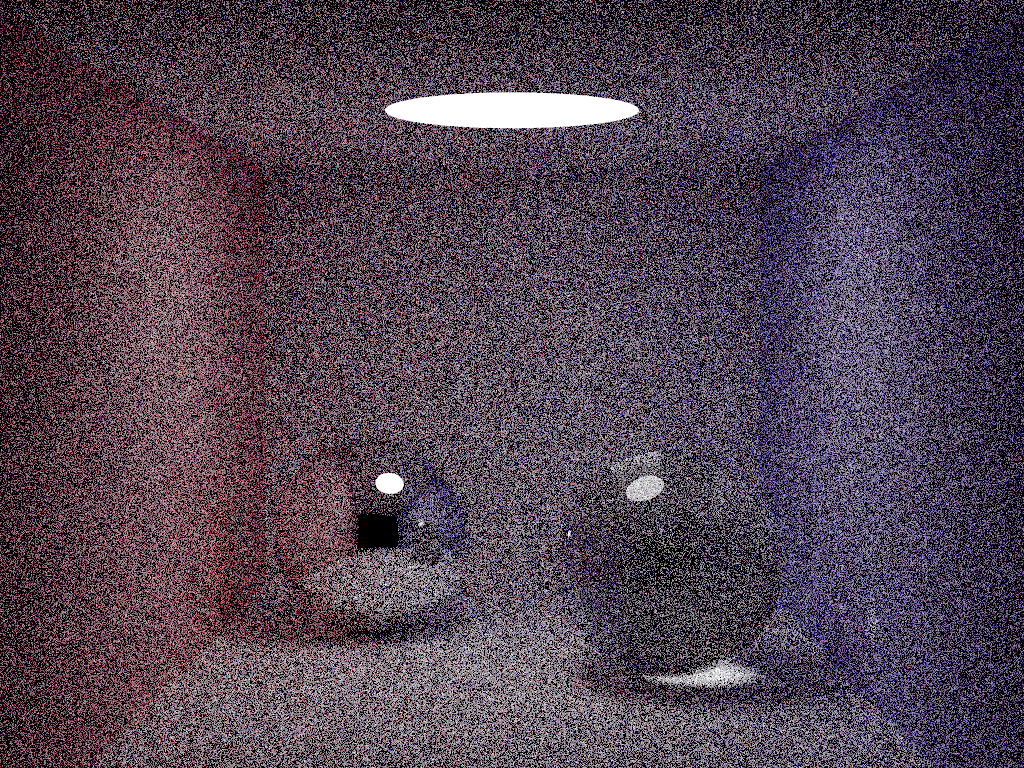

In [43]:
# Convert the image to png and display
convert(device=False)
IPython.display.Image('cpu-image.png')

### GPU Implementation

#### Compiling and running smallpt on GPU:
We compile the smallpt code and run the executable to generate the image.

In [44]:
!nvcc src/gpu/gpu-smallpt.cu -o gpu-smallpt
!./gpu-smallpt 64

Number of samples: 16


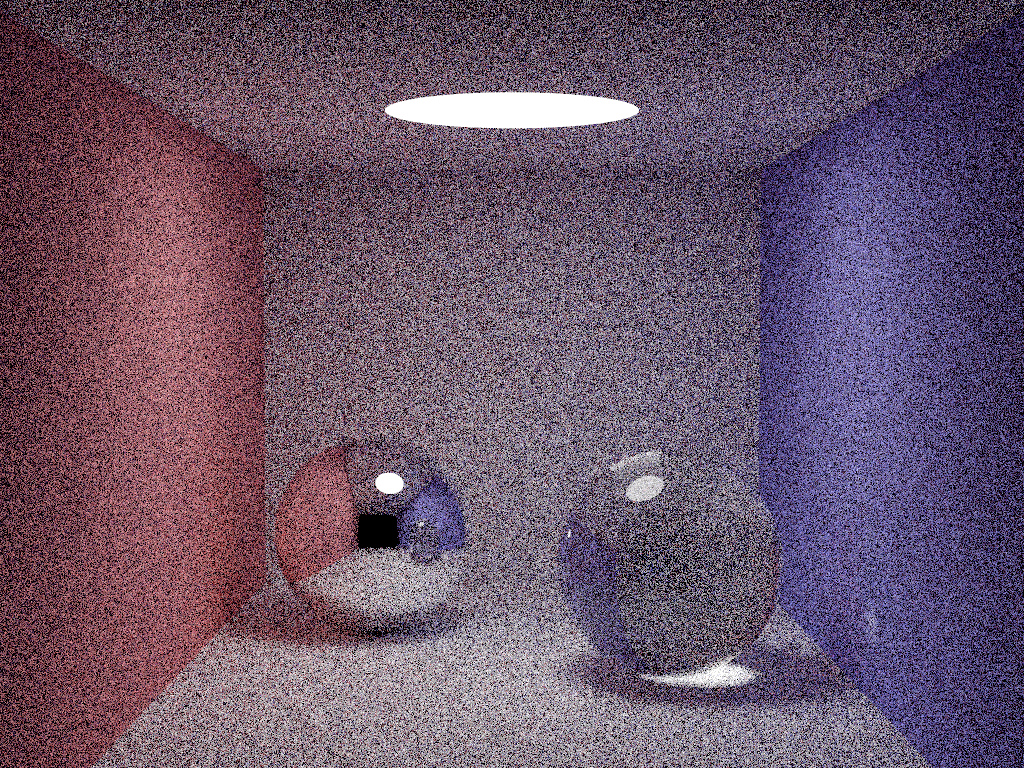

In [36]:
# Convert the image to png and display
convert(device=True)
IPython.display.Image('gpu-image.png')

### Results

#### XOR Results

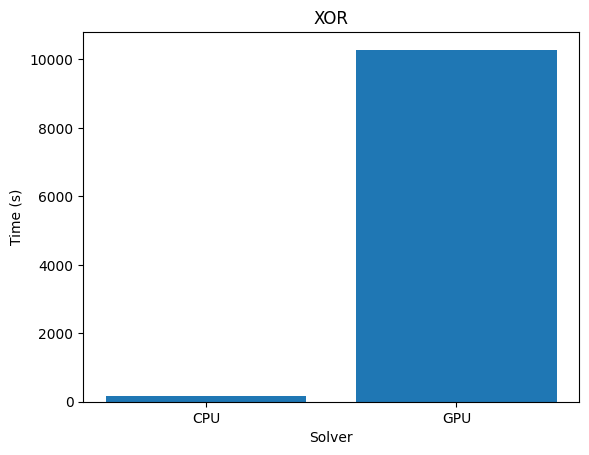

In [ ]:
import matplotlib.pyplot as plt

# XOR
x = ["CPU", "GPU"]
# Read the data from the file and average the time
with open("cpu_xor.txt", "r") as f:
    cpu_xor = [float(i) for i in f.readlines()]
    cpu_xor = sum(cpu_xor) / len(cpu_xor)

with open("gpu_xor.txt", "r") as f:
    gpu_xor = [float(i) for i in f.readlines()]
    gpu_xor = sum(gpu_xor) / len(gpu_xor)

y = [cpu_xor, gpu_xor]
plt.bar(x, y)
plt.title("XOR")
plt.xlabel("Solver")
plt.ylabel("Time (s)")
plt.show()

We see that the time taken by our custom neural network is much higher than the time taken by the neural network in the Eigen library. This is because the Eigen library is highly optimized and while our code leverages the GPU for matrix operations, it is not as optimized as the Eigen library.

#### MNIST Results

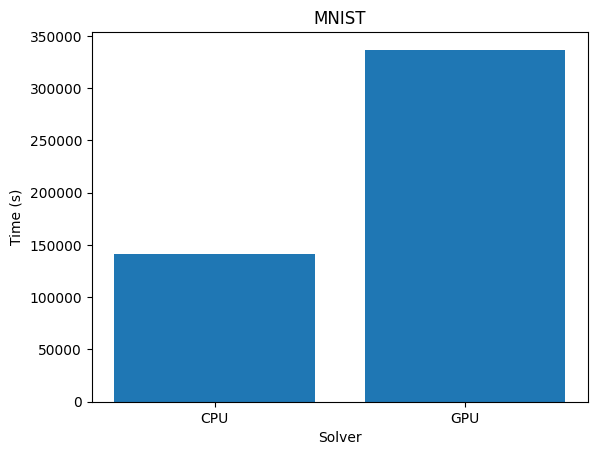

In [ ]:
import matplotlib.pyplot as plt

# MNIST
x = ["CPU", "GPU"]
# Read the data from the file and average the time
with open("cpu_mnist.txt", "r") as f:
    cpu_mnist = [float(i) for i in f.readlines()]
    cpu_mnist = sum(cpu_mnist) / len(cpu_mnist)

with open("gpu_mnist.txt", "r") as f:
    gpu_mnist = [float(i) for i in f.readlines()]
    gpu_mnist = sum(gpu_mnist) / len(gpu_mnist)

y = [cpu_mnist, gpu_mnist]
plt.bar(x, y)
plt.title("MNIST")
plt.xlabel("Solver")
plt.ylabel("Time (s)")
plt.show()

We see similar results for the MNIST dataset as well. The overhead of copying the data to the GPU and back to the CPU is much higher than the time taken by the CPU to perform the matrix operations. This is why we see that the time taken by our custom neural network is much higher than the time taken by the neural network in the Eigen library.

### Improvements

We can improve our code by leveraging the different memory levels of the GPU. We can use shared memory to store the input and output of the layers and use the global memory to store the weights and biases. This will reduce the overhead of copying the data to the GPU and back to the CPU. We can also speed up the processing by using more efficient kernel configurations.